In [66]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import os
import pickle
from pathlib import Path
import matplotlib.pyplot as plt



In [68]:
import opendatasets as od


In [69]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [70]:
od.download("https://www.kaggle.com/datasets/fedesoriano/cifar100")

Skipping, found downloaded files in "./cifar100" (use force=True to force download)


In [71]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'/content/cifar100'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/cifar100/test
/content/cifar100/meta
/content/cifar100/file.txt
/content/cifar100/train


In [72]:
labels = pickle.load(Path(r'/content/cifar100/meta').open('rb'))

In [73]:
np.shape(labels)

()

In [74]:
labels.keys()

dict_keys(['fine_label_names', 'coarse_label_names'])

In [75]:
np.shape(labels["fine_label_names"])

(100,)

In [76]:
labels["coarse_label_names"]

['aquatic_mammals',
 'fish',
 'flowers',
 'food_containers',
 'fruit_and_vegetables',
 'household_electrical_devices',
 'household_furniture',
 'insects',
 'large_carnivores',
 'large_man-made_outdoor_things',
 'large_natural_outdoor_scenes',
 'large_omnivores_and_herbivores',
 'medium_mammals',
 'non-insect_invertebrates',
 'people',
 'reptiles',
 'small_mammals',
 'trees',
 'vehicles_1',
 'vehicles_2']

In [77]:
np.shape(labels["coarse_label_names"])

(20,)

In [78]:
train_data = pickle.load(Path(r'/content/cifar100/train').open('rb'), encoding='bytes')


In [79]:
train_data

{b'filenames': [b'bos_taurus_s_000507.png',
  b'stegosaurus_s_000125.png',
  b'mcintosh_s_000643.png',
  b'altar_boy_s_001435.png',
  b'cichlid_s_000031.png',
  b'phone_s_002161.png',
  b'car_train_s_000043.png',
  b'beaker_s_000604.png',
  b'fog_s_000397.png',
  b'rogue_elephant_s_000421.png',
  b'computer_keyboard_s_000757.png',
  b'willow_tree_s_000645.png',
  b'sunflower_s_000549.png',
  b'palace_s_000759.png',
  b'adriatic_s_001782.png',
  b'computer_keyboard_s_001277.png',
  b'bike_s_000682.png',
  b'wolf_pup_s_001323.png',
  b'squirrel_s_002467.png',
  b'sea_s_000678.png',
  b'shrew_s_002233.png',
  b'pine_tree_s_000087.png',
  b'rose_s_000373.png',
  b'surveillance_system_s_000769.png',
  b'pine_s_001533.png',
  b'table_s_000897.png',
  b'opossum_s_001237.png',
  b'quercus_alba_s_000257.png',
  b'leopard_s_000414.png',
  b'possum_s_002195.png',
  b'bike_s_000127.png',
  b'balmoral_castle_s_000361.png',
  b'acer_saccharinum_s_000646.png',
  b'lapin_s_000916.png',
  b'chimp_s_001

In [80]:
train_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [81]:
print("Fine Labels:", set(train_data[b'fine_labels']))
print("Coarse Labels:", set(train_data[b'coarse_labels']))

Fine Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Coarse Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [82]:
for i in train_data.keys():
    print(i,"=",train_data[i],"/n")

b'filenames' = [b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663.png', b'male_c

In [83]:
for i in train_data.keys():
    print(i,"=",np.shape(train_data[i]),"/n")

b'filenames' = (50000,) /n
b'batch_label' = () /n
b'fine_labels' = (50000,) /n
b'coarse_labels' = (50000,) /n
b'data' = (50000, 3072) /n


In [84]:
test_data = pickle.load(Path(r'/content/cifar100/test').open('rb'), encoding='bytes')

In [85]:
test_data

{b'filenames': [b'volcano_s_000012.png',
  b'woods_s_000412.png',
  b'seal_s_001803.png',
  b'mushroom_s_001755.png',
  b'adriatic_sea_s_000653.png',
  b'tulipa_clusiana_s_000175.png',
  b'camel_s_001052.png',
  b'mourning_cloak_s_000143.png',
  b'cirrostratus_s_000223.png',
  b'eating_apple_s_000763.png',
  b'adriatic_s_000380.png',
  b'skunk_s_001175.png',
  b'streetcar_s_000382.png',
  b'sounding_rocket_s_000010.png',
  b'lamp_s_001350.png',
  b'king_of_beasts_s_001221.png',
  b'tulipa_clusiana_s_000186.png',
  b'timber_wolf_s_000622.png',
  b'rose_s_002192.png',
  b'valencia_orange_s_001542.png',
  b'mountain_rose_s_000209.png',
  b'mount_s_002678.png',
  b'striped_skunk_s_001304.png',
  b'dinosaur_s_000326.png',
  b'chimpanzee_s_000134.png',
  b'oilcan_s_000656.png',
  b'keyboard_s_001529.png',
  b'safety_bike_s_000390.png',
  b'bike_s_000658.png',
  b'rose_s_000120.png',
  b'chaise_s_001826.png',
  b'fishplate_s_000669.png',
  b'motor_mower_s_000528.png',
  b'sea_turtle_s_000882.

In [86]:
test_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [87]:
print("Fine Labels:", set(test_data[b'fine_labels']))
print("Coarse Labels:", set(test_data[b'coarse_labels']))

Fine Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Coarse Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [88]:
for i in test_data.keys():
    print(i,"=",test_data[i],"/n")

b'filenames' = [b'volcano_s_000012.png', b'woods_s_000412.png', b'seal_s_001803.png', b'mushroom_s_001755.png', b'adriatic_sea_s_000653.png', b'tulipa_clusiana_s_000175.png', b'camel_s_001052.png', b'mourning_cloak_s_000143.png', b'cirrostratus_s_000223.png', b'eating_apple_s_000763.png', b'adriatic_s_000380.png', b'skunk_s_001175.png', b'streetcar_s_000382.png', b'sounding_rocket_s_000010.png', b'lamp_s_001350.png', b'king_of_beasts_s_001221.png', b'tulipa_clusiana_s_000186.png', b'timber_wolf_s_000622.png', b'rose_s_002192.png', b'valencia_orange_s_001542.png', b'mountain_rose_s_000209.png', b'mount_s_002678.png', b'striped_skunk_s_001304.png', b'dinosaur_s_000326.png', b'chimpanzee_s_000134.png', b'oilcan_s_000656.png', b'keyboard_s_001529.png', b'safety_bike_s_000390.png', b'bike_s_000658.png', b'rose_s_000120.png', b'chaise_s_001826.png', b'fishplate_s_000669.png', b'motor_mower_s_000528.png', b'sea_turtle_s_000882.png', b'elaeis_guineensis_s_000412.png', b'mackerel_shark_s_001042

In [89]:
for i in test_data.keys():
    print(i,"=",np.shape(test_data[i]),"/n")

b'filenames' = (10000,) /n
b'batch_label' = () /n
b'fine_labels' = (10000,) /n
b'coarse_labels' = (10000,) /n
b'data' = (10000, 3072) /n


In [90]:

X_train = train_data[b'data']
X_train = X_train.reshape(len(X_train),3,32,32)


In [91]:
np.shape(X_train)

(50000, 3, 32, 32)

In [92]:
X_train = X_train.transpose(0,2,3,1)


In [93]:
np.shape(X_train)

(50000, 32, 32, 3)

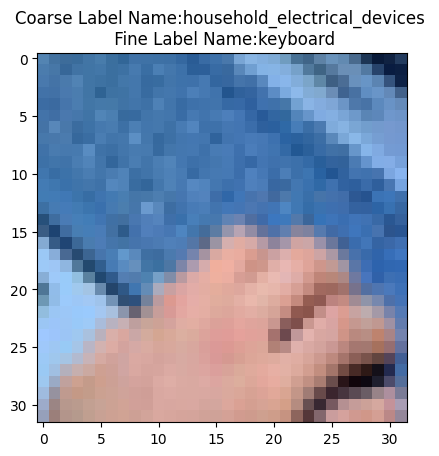

In [94]:
a =train_data[b"data"][10]
f_lable=train_data[b'fine_labels'][10]
c_lable=train_data[b'coarse_labels'][10]
coarse_name=labels['coarse_label_names'][c_lable]
fine_name=labels['fine_label_names'][f_lable]
a=a.reshape(3,32,32).transpose(1,2,0)

plt.title("Coarse Label Name:{} \n Fine Label Name:{}"
          .format(coarse_name, fine_name))
plt.imshow(a)

In [95]:
train_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [96]:
Y_train = train_data[b'fine_labels']

In [97]:
np.shape(Y_train)

(50000,)

In [98]:
test_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [99]:
x_test=test_data[b'data']
x_test = x_test.reshape(len(x_test),3,32,32)
x_test = x_test.transpose(0,2,3,1)

In [100]:
x_test.shape

(10000, 32, 32, 3)

In [101]:
Y_test=test_data[b'fine_labels']

In [102]:
np.shape(Y_test)

(10000,)

In [103]:
classes = len(set(test_data[b'fine_labels']))

In [104]:
classes

100

In [105]:
y_train= np.array(Y_train)

In [106]:
y_train.shape

(50000,)

In [107]:
y_test=np.array(Y_test)

In [108]:
y_train=pd.get_dummies(y_train)

In [109]:
y_train.shape

(50000, 100)

In [110]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
y_test=pd.get_dummies(y_test)

In [112]:
y_test.shape

(10000, 100)

In [113]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


In [115]:
x_train =  X_train.astype('float32')

In [116]:
X_test= x_test.astype('float32')

In [117]:
X_train=(x_train)/255
X_test=(X_test)/255

In [118]:
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


In [119]:
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

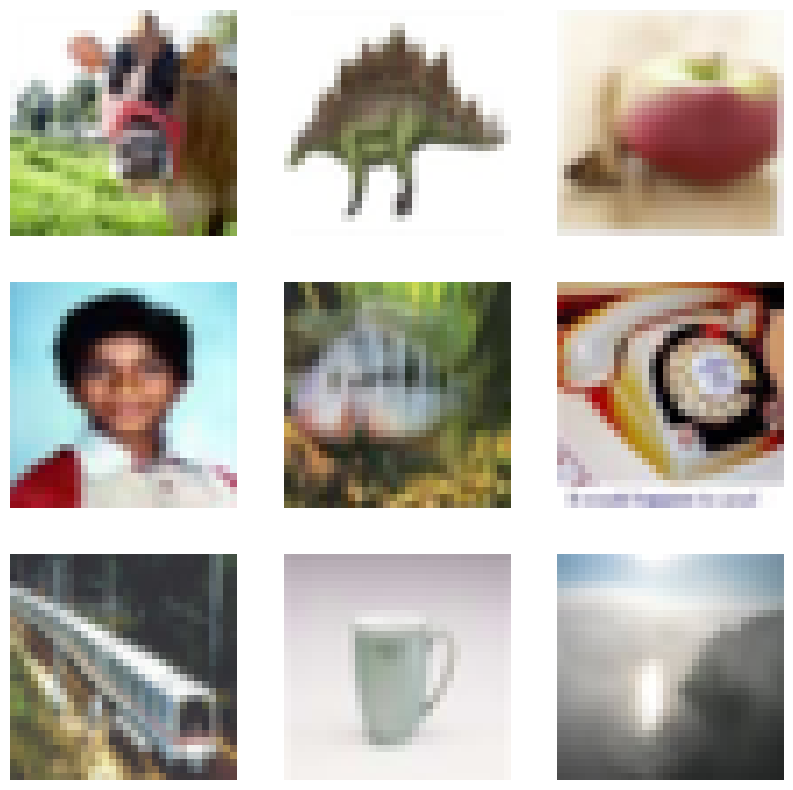

In [120]:
plt.figure(figsize=(10, 10))

for i in range (3*3):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

plt.show()

In [121]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout,BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [122]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_data=(X_val, y_val))

model.summary()

Epoch 1/2
782/782 [==============================] - 23s 18ms/step - loss: 3.7712 - accuracy: 0.1601 - val_loss: 2.8538 - val_accuracy: 0.2994
Epoch 2/2
782/782 [==============================] - 10s 12ms/step - loss: 2.7756 - accuracy: 0.3092 - val_loss: 2.1429 - val_accuracy: 0.4380
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)               

In [123]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.3927 - accuracy: 0.3870
Test accuracy: 0.3869999945163727


In [124]:

def create_model(activation='relu'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [125]:
model.fit(X_sub_train, y_sub_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

model.summary()

Epoch 1/5
625/625 [==============================] - 8s 13ms/step - loss: 2.4097 - accuracy: 0.3808 - val_loss: 2.0533 - val_accuracy: 0.4598
Epoch 2/5
625/625 [==============================] - 8s 13ms/step - loss: 2.1913 - accuracy: 0.4221 - val_loss: 2.0899 - val_accuracy: 0.4517
Epoch 3/5
625/625 [==============================] - 8s 12ms/step - loss: 2.0176 - accuracy: 0.4611 - val_loss: 1.9996 - val_accuracy: 0.4748
Epoch 4/5
625/625 [==============================] - 8s 13ms/step - loss: 1.8683 - accuracy: 0.4945 - val_loss: 1.9534 - val_accuracy: 0.4809
Epoch 5/5
625/625 [==============================] - 8s 14ms/step - loss: 1.7406 - accuracy: 0.5242 - val_loss: 2.0967 - val_accuracy: 0.4617
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 ba

In [126]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.1416 - accuracy: 0.4532
Test accuracy: 0.45320001244544983


In [127]:
# Define the Keras model as a function
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation('softmax'))

    model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

# Define the list of optimizers to try
optimizers = ['sgd', 'adam', 'rmsprop']

# Create the Keras classifier
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=50, verbose=1)

# Define the parameter grid
param_grid = {'optimizer': optimizers}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

# # Print the results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-127-026ee234d339>:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=50, verbose=1)


Epoch 1/30
534/534 [==============================] - 10s 17ms/step - loss: 4.6047 - accuracy: 0.0103
Epoch 2/30
534/534 [==============================] - 8s 15ms/step - loss: 4.5985 - accuracy: 0.0130
Epoch 3/30
534/534 [==============================] - 8s 15ms/step - loss: 4.5595 - accuracy: 0.0189
Epoch 4/30
534/534 [==============================] - 8s 15ms/step - loss: 4.4309 - accuracy: 0.0288
Epoch 5/30
534/534 [==============================] - 8s 15ms/step - loss: 4.3280 - accuracy: 0.0395
Epoch 6/30
534/534 [==============================] - 8s 15ms/step - loss: 4.2363 - accuracy: 0.0511
Epoch 7/30
534/534 [==============================] - 8s 15ms/step - loss: 4.1469 - accuracy: 0.0657
Epoch 8/30
534/534 [==============================] - 8s 15ms/step - loss: 4.0598 - accuracy: 0.0781
Epoch 9/30
534/534 [==============================] - 8s 15ms/step - loss: 3.9917 - accuracy: 0.0849
Epoch 10/30
534/534 [==============================] - 8s 15ms/step - loss: 3.9252 - accur

KeyboardInterrupt: ignored

In [ ]:
results = grid.cv_results_

In [ ]:
i = 0
while i < len(results["mean_test_score"]):
    mean_score = results["mean_test_score"][i]
    params = results["params"][i]
    print("%f using %s" % (mean_score, params))
    i += 1
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))